In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit,train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report,accuracy_score

In [42]:
df = pd.read_csv('breast_cancer.csv')
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [44]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [45]:
df = df.dropna()

In [46]:
df[df.duplicated]

Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]

In [47]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [48]:
le = LabelEncoder()
df['diagnosis'] = pd.to_numeric(le.fit_transform(df['diagnosis']))
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [49]:
X = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [50]:
# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)
 #train svm
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
print("Train Accuracy:",svm_clf.score(X_train,y_train))
print("Test Accuracy:",svm_clf.score(X_test,y_test))

Train Accuracy: 0.9186813186813186
Test Accuracy: 0.9035087719298246


In [52]:
# reduced dimenisions of X-cols using tsne
data_tsne = TSNE(n_components = 2,perplexity = 30).fit_transform(X_scaled)
data_tsne

array([[ 38.57891  ,   2.4947236],
       [ 24.30345  ,   6.943472 ],
       [ 31.9387   ,   3.5644934],
       ...,
       [ 15.465737 ,   4.2685933],
       [ 39.618515 ,   4.7540855],
       [-26.024998 ,   4.2428007]], dtype=float32)

In [53]:
svm_vis = SVC()
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

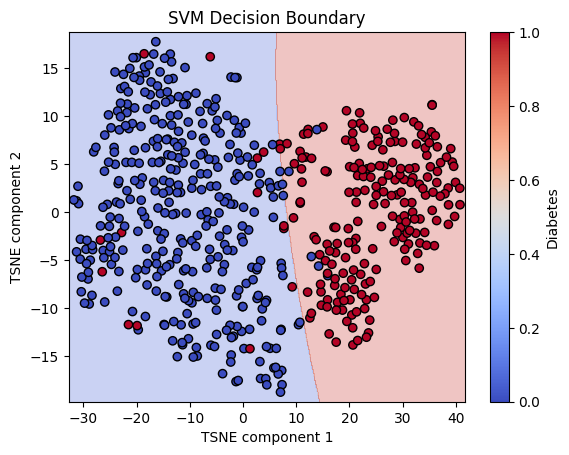

In [54]:
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

In [55]:
y_pred = svm_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9035087719298246
              precision    recall  f1-score   support

           B       0.87      1.00      0.93        72
           M       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



In [69]:
#train svm
svm_clf = SVC(kernel='rbf',C=10,gamma = 0.05)
svm_clf.fit(X_train,y_train)
print("Train Accuracy:",svm_clf.score(X_train,y_train))
print("Test Accuracy:",svm_clf.score(X_test,y_test))
svm_vis = SVC(kernel='rbf',C=10,gamma = 0.05)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.631578947368421


Train Accuracy: 0.6263736263736264
Test Accuracy: 0.631578947368421


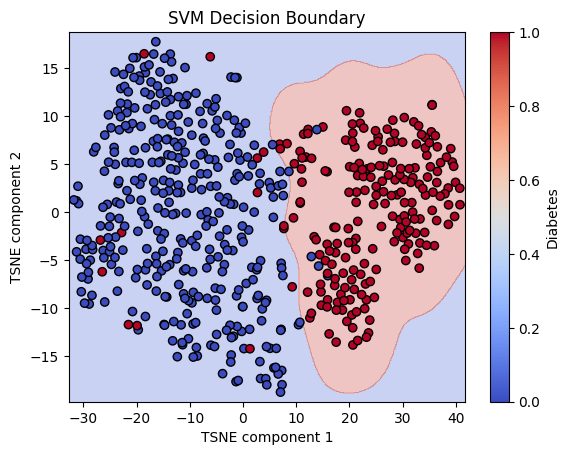

In [70]:
 #train svm
svm_clf = SVC(kernel='rbf',C=0.5,gamma = 0.05)
svm_clf.fit(X_train,y_train)
print("Train Accuracy:",svm_clf.score(X_train,y_train))
print("Test Accuracy:",svm_clf.score(X_test,y_test))
svm_vis = SVC(kernel='rbf',C=0.5,gamma = 0.05)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.631578947368421


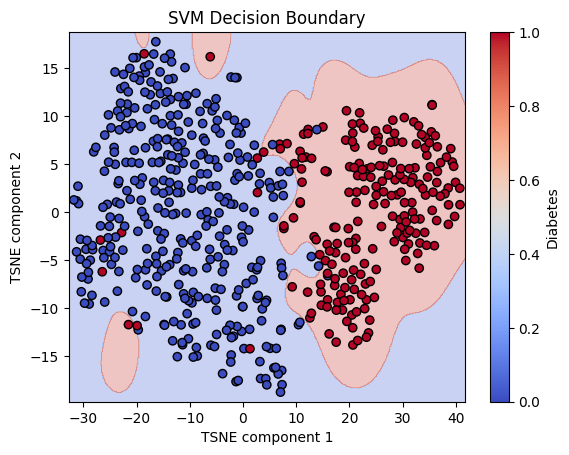

In [71]:
#train svm
svm_clf = SVC(kernel='rbf',C=20,gamma = 0.05)
svm_clf.fit(X_train,y_train)
print("Train Accuracy:",svm_clf.score(X_train,y_train))
print("Test Accuracy:",svm_clf.score(X_test,y_test))
svm_vis = SVC(kernel='rbf',C=20,gamma = 0.05)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.631578947368421


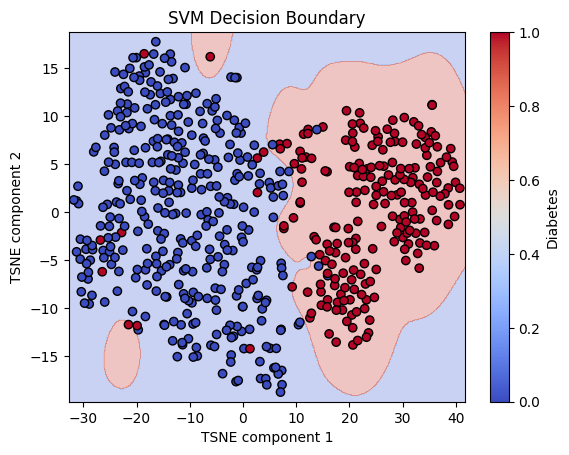

In [72]:
#train svm
svm_clf = SVC(kernel='rbf',C=5,gamma = 0.05)
svm_clf.fit(X_train,y_train)
print("Train Accuracy:",svm_clf.score(X_train,y_train))
print("Test Accuracy:",svm_clf.score(X_test,y_test))
svm_vis = SVC(kernel='rbf',C=5,gamma = 0.05)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 0.9186813186813186
Test Accuracy: 0.9035087719298246


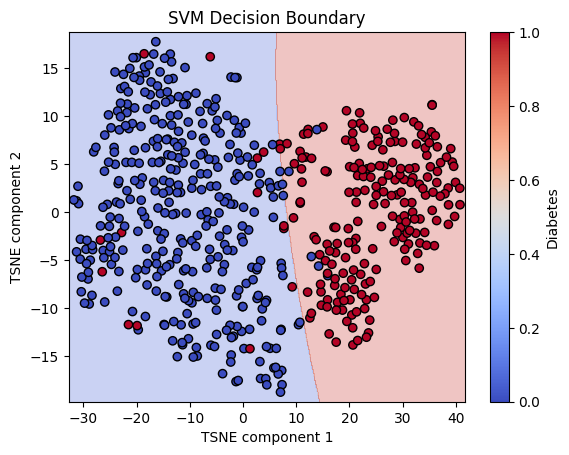

In [73]:
#train svm
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train,y_train)
print("Train Accuracy:",svm_clf.score(X_train,y_train))
print("Test Accuracy:",svm_clf.score(X_test,y_test))
svm_vis = SVC(kernel='rbf')
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [57]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6354166666666666, 0.9375, 'x[22] <= 114.45\nentropy = 0.953\nsamples = 455\nvalue = [285, 170]'),
 Text(0.3541666666666667, 0.8125, 'x[27] <= 0.111\nentropy = 0.439\nsamples = 308\nvalue = [280, 28]'),
 Text(0.49479166666666663, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'x[13] <= 45.17\nentropy = 0.12\nsamples = 245\nvalue = [241, 4]'),
 Text(0.08333333333333333, 0.5625, 'x[21] <= 33.35\nentropy = 0.039\nsamples = 238\nvalue = [237, 1]'),
 Text(0.041666666666666664, 0.4375, 'entropy = 0.0\nsamples = 223\nvalue = [223, 0]'),
 Text(0.125, 0.4375, 'x[1] <= 23.2\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.08333333333333333, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.3125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.25, 0.5625, 'x[15] <= 0.014\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.20833333333333334, 0.4375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2916666666666667, 0.4375

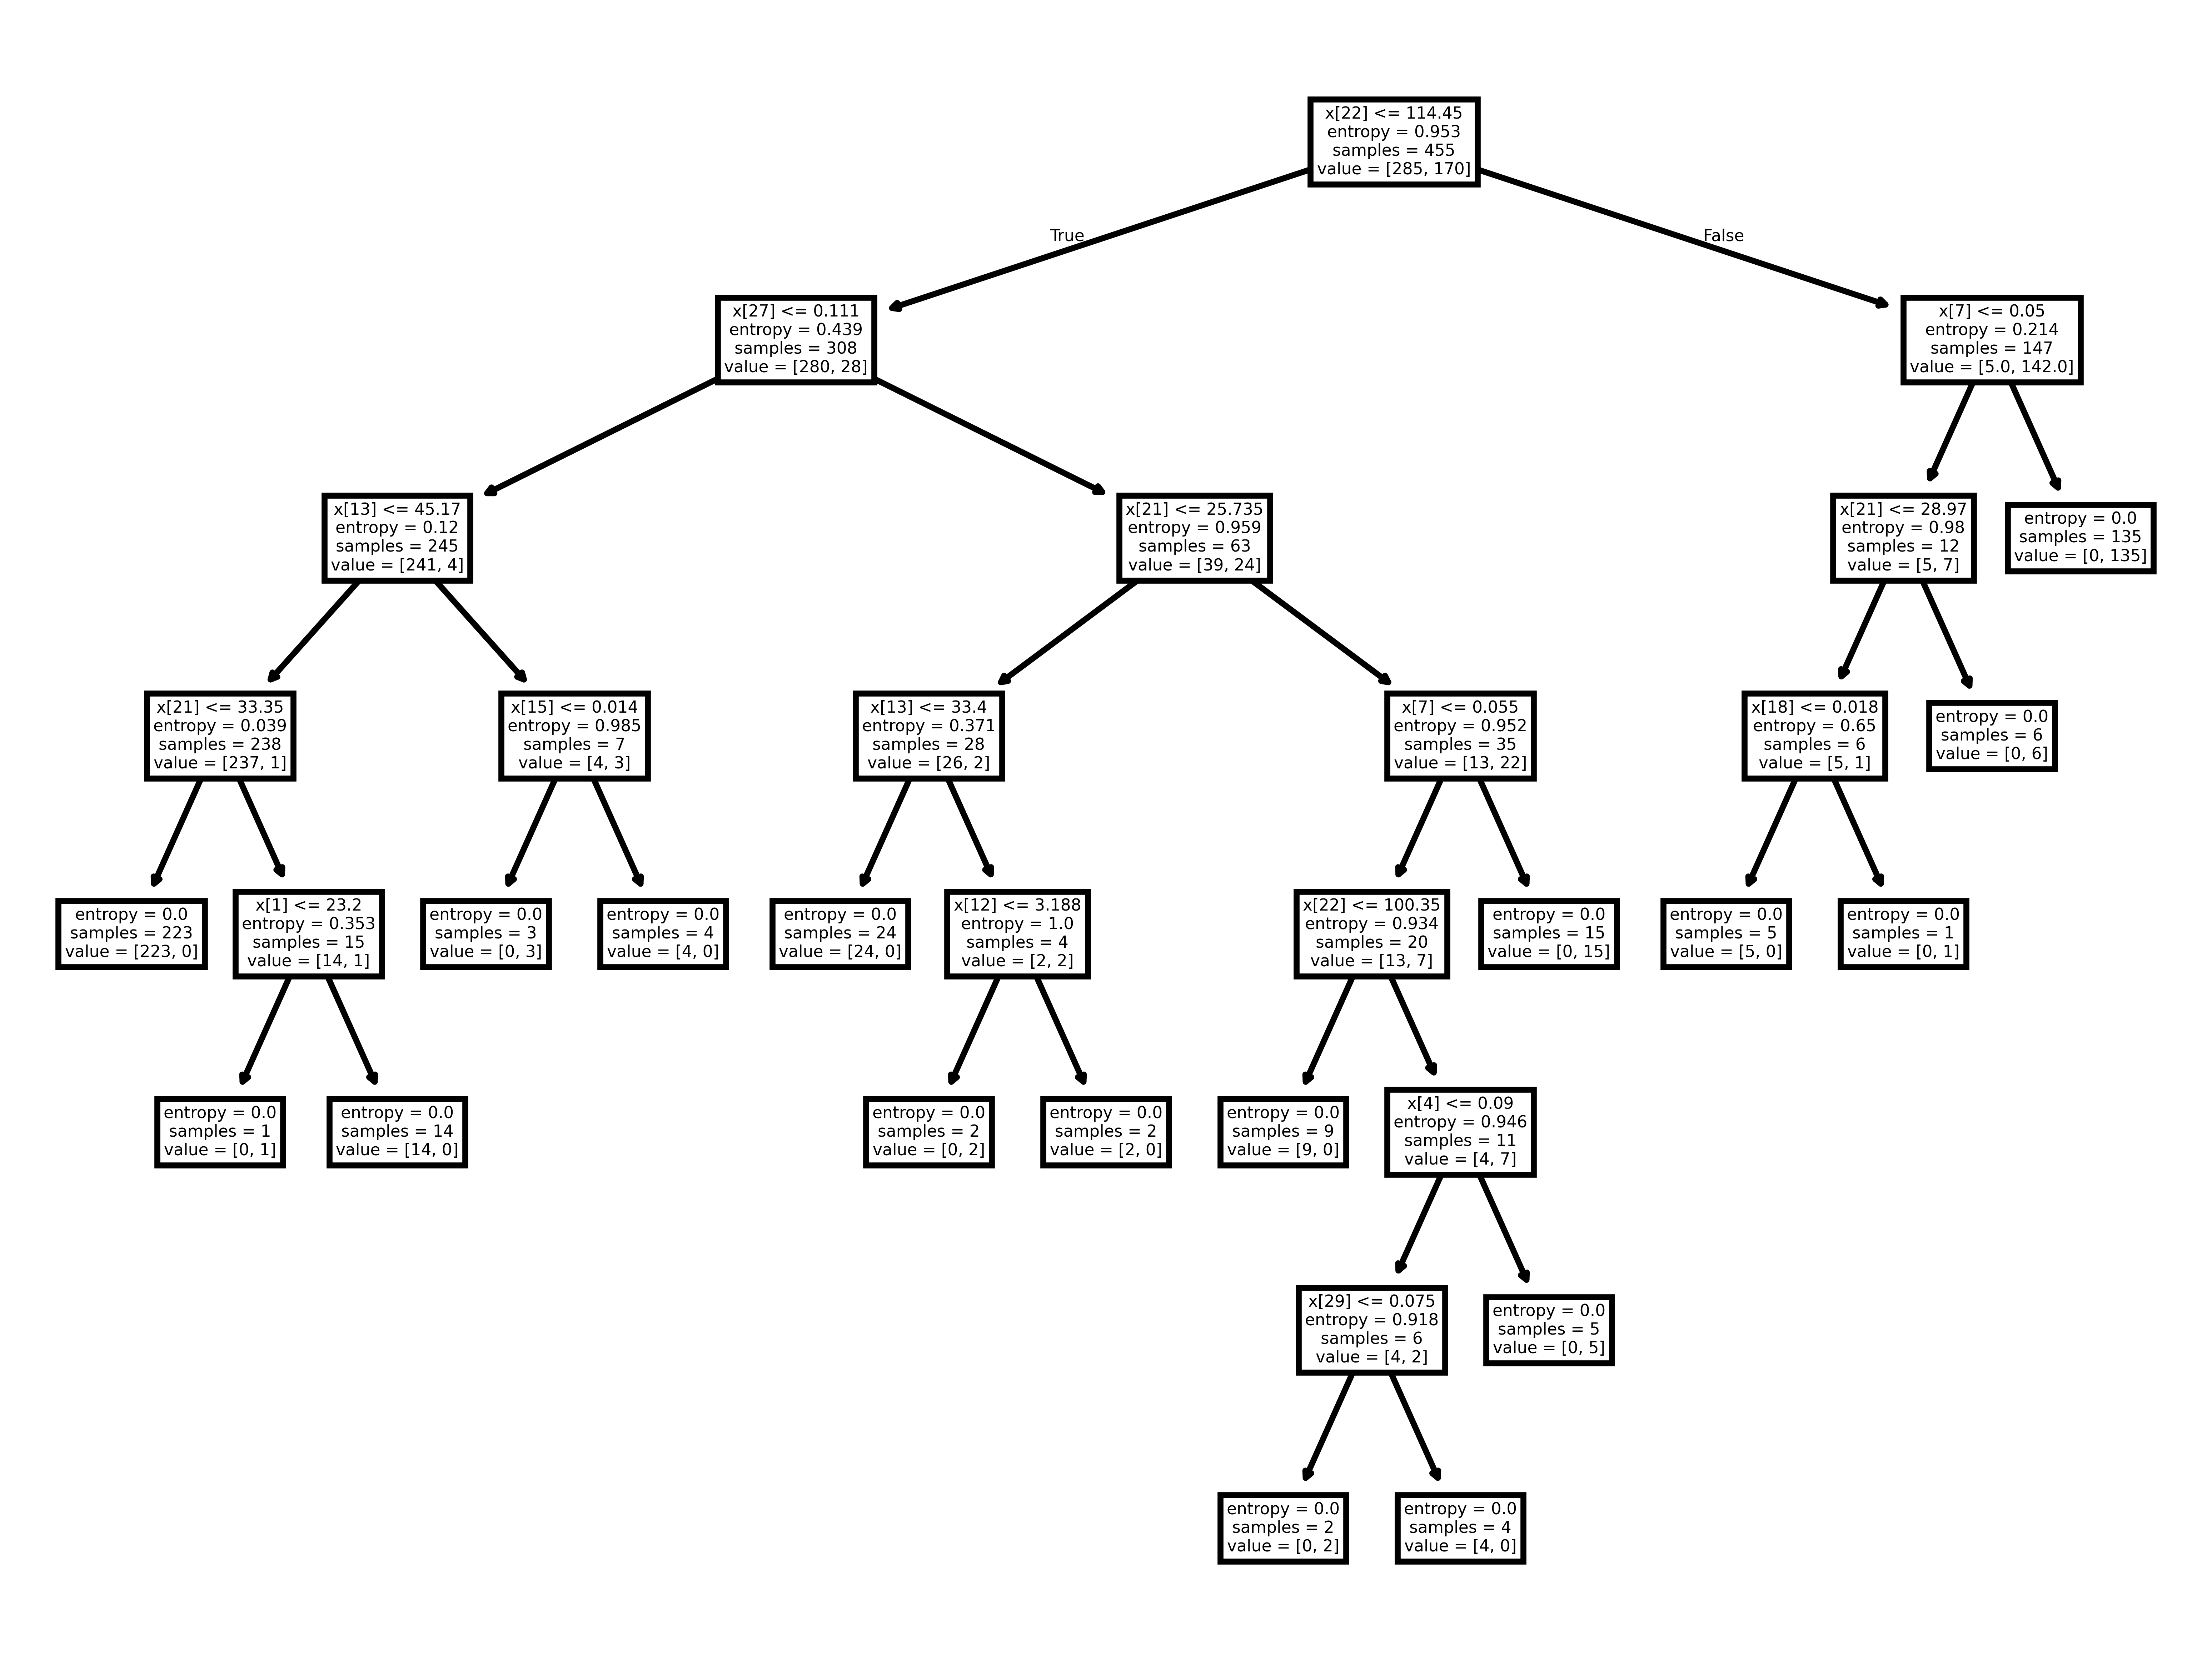

In [58]:
plt.figure(dpi = 1200)
tree.plot_tree(model)

[Text(0.6354166666666666, 0.9375, 'perimeter_worst <= 114.45\nentropy = 0.953\nsamples = 455\nvalue = [285, 170]\nclass = M'),
 Text(0.3541666666666667, 0.8125, 'concave points_worst <= 0.111\nentropy = 0.439\nsamples = 308\nvalue = [280, 28]\nclass = M'),
 Text(0.49479166666666663, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'area_se <= 45.17\nentropy = 0.12\nsamples = 245\nvalue = [241, 4]\nclass = M'),
 Text(0.08333333333333333, 0.5625, 'texture_worst <= 33.35\nentropy = 0.039\nsamples = 238\nvalue = [237, 1]\nclass = M'),
 Text(0.041666666666666664, 0.4375, 'entropy = 0.0\nsamples = 223\nvalue = [223, 0]\nclass = M'),
 Text(0.125, 0.4375, 'texture_mean <= 23.2\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]\nclass = M'),
 Text(0.08333333333333333, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B'),
 Text(0.16666666666666666, 0.3125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = M'),
 Text(0.25, 0.5625, 'compactness_se <= 0.014\nentropy = 0.985\nsampl

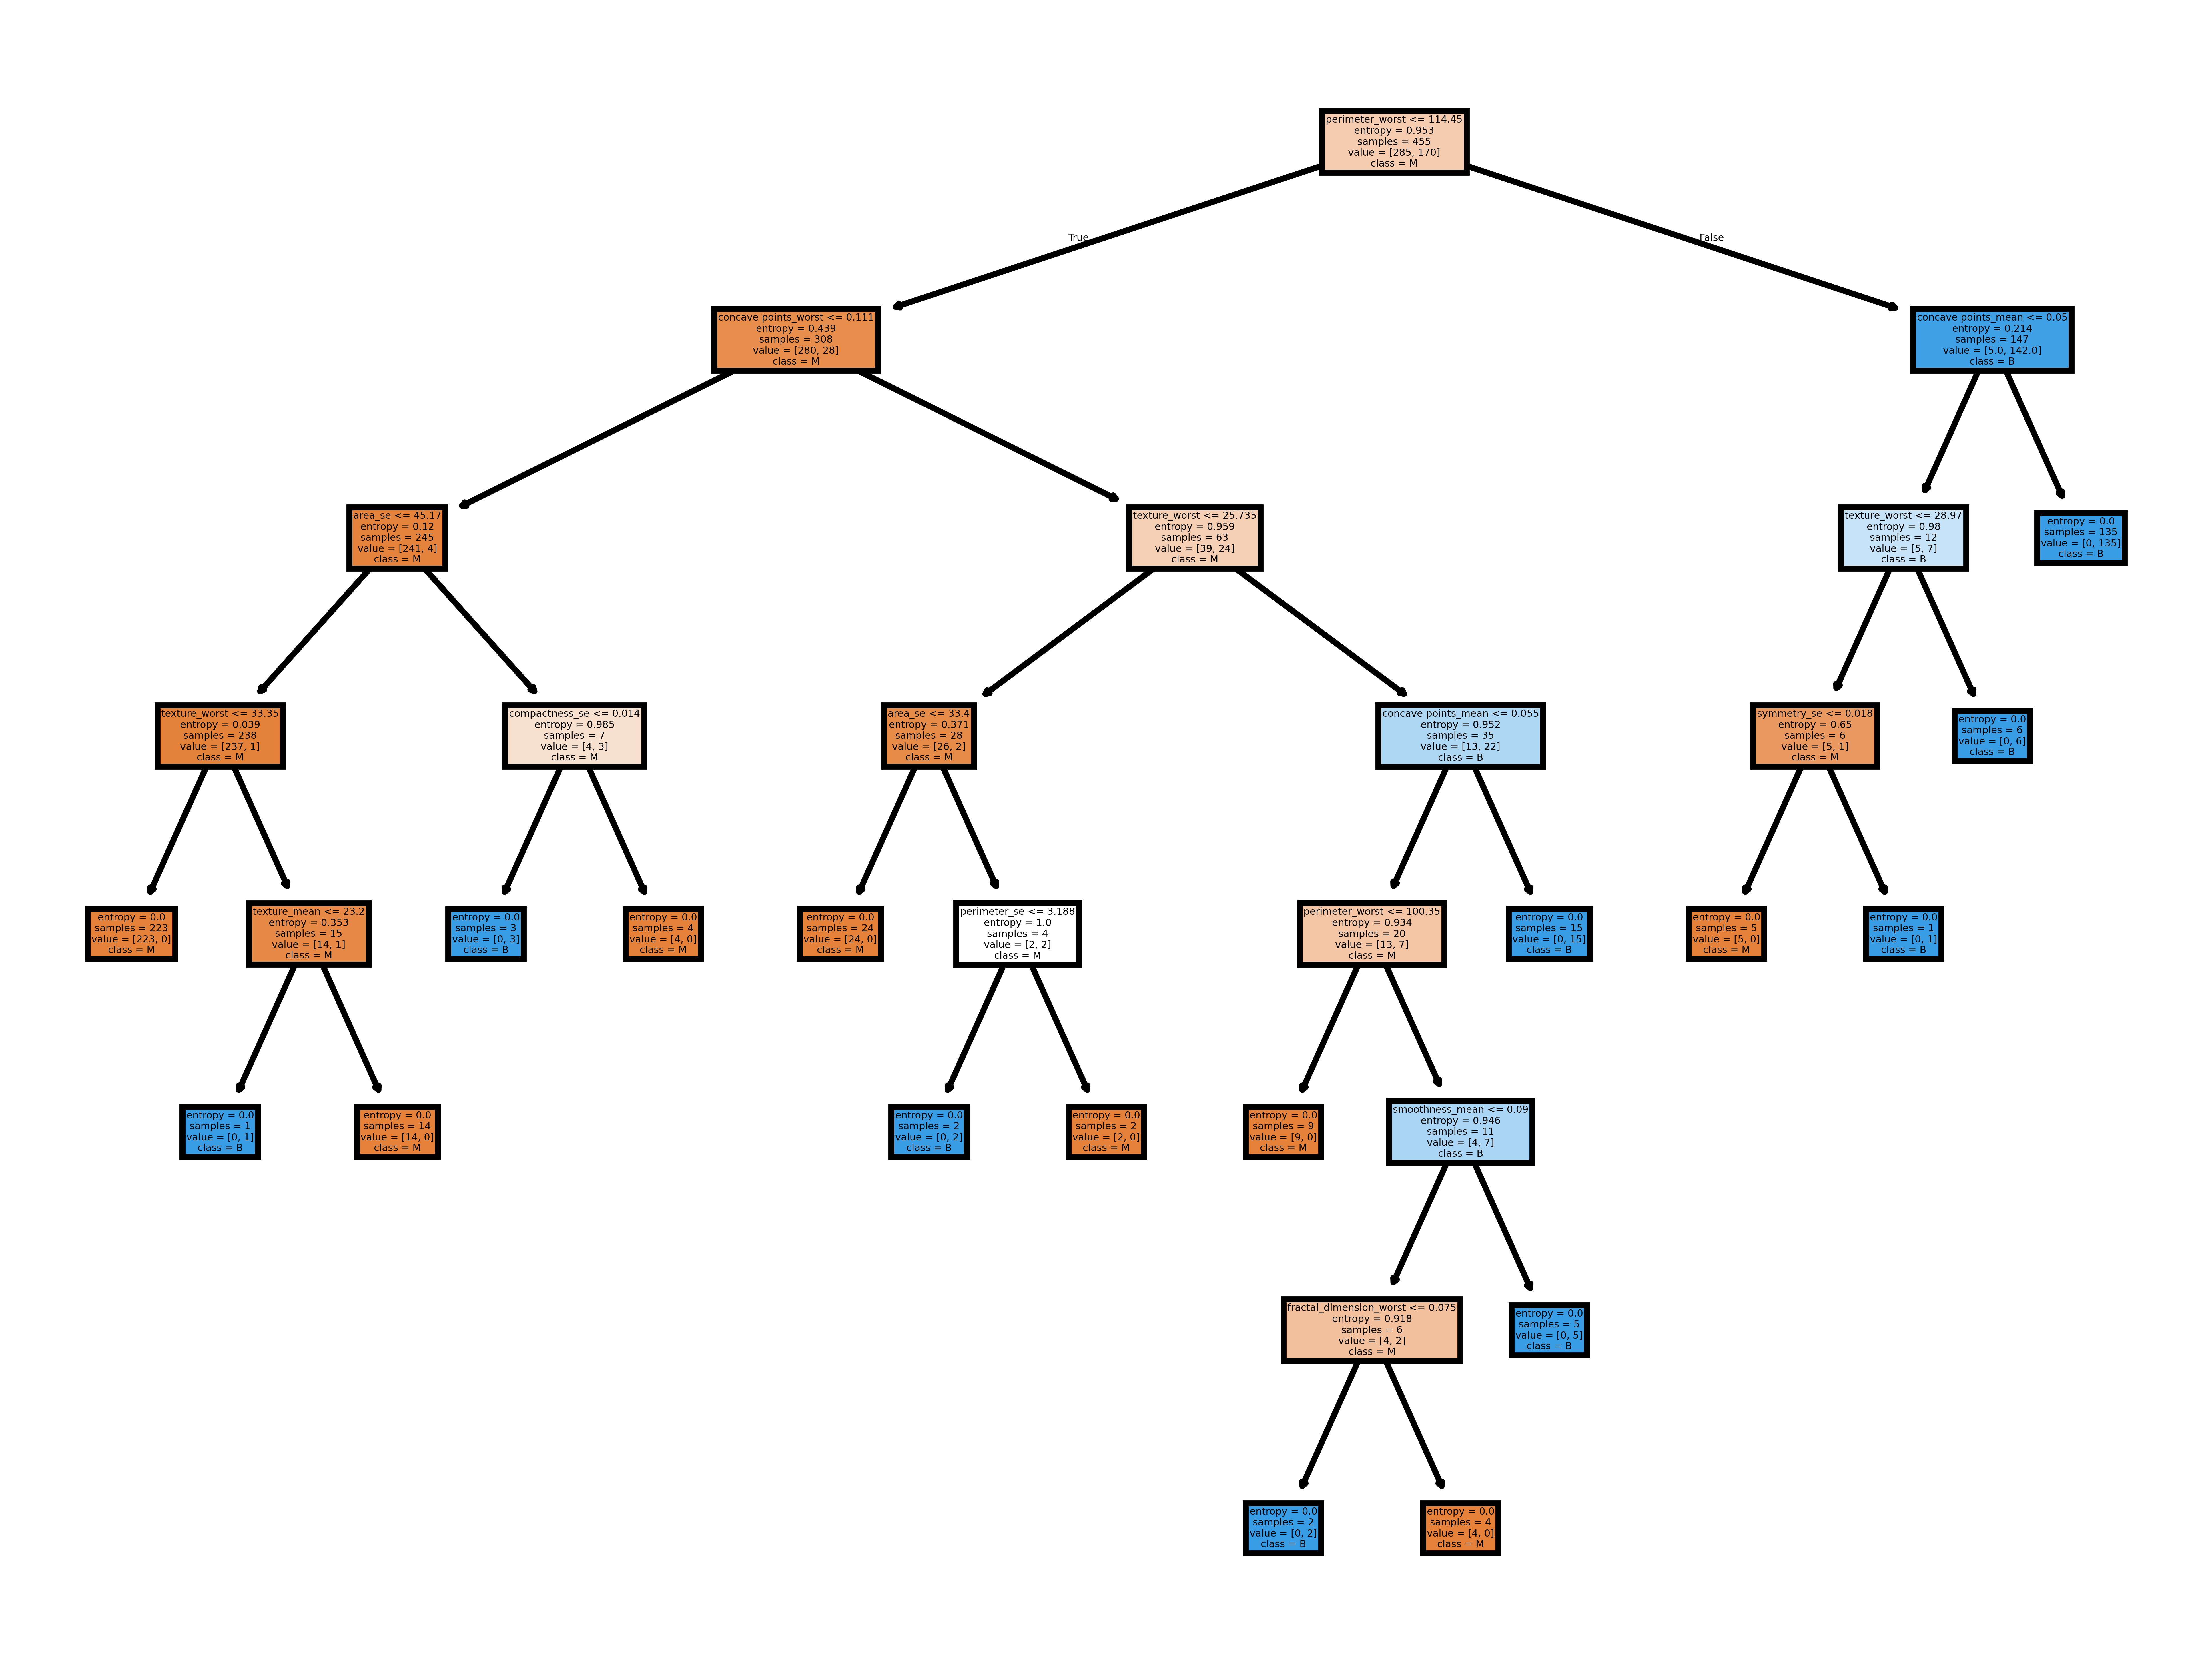

In [59]:
# decision tree with col names
fn = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'
     ,'compactness_mean','concavity_mean','concave points_mean','symmetry_mean',
     'fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se',
     'smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
     'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
     'smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
'symmetry_worst','fractal_dimension_worst']
cn = ['M','B']
plt.figure(dpi = 1500)
tree.plot_tree(model,feature_names = fn,class_names = cn,filled=True)

In [60]:
pred = model.predict(X_test)
pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1])

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [62]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=None)
model1.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6449652777777778, 0.9444444444444444, 'perimeter_worst <= 112.8\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = M'),
 Text(0.4982638888888889, 0.8333333333333334, 'concave points_worst <= 0.16\ngini = 0.137\nsamples = 297\nvalue = [275, 22]\nclass = M'),
 Text(0.5716145833333334, 0.8888888888888888, 'True  '),
 Text(0.3854166666666667, 0.7222222222222222, 'area_mean <= 696.25\ngini = 0.081\nsamples = 285\nvalue = [273, 12]\nclass = M'),
 Text(0.2986111111111111, 0.6111111111111112, 'smoothness_worst <= 0.178\ngini = 0.056\nsamples = 279\nvalue = [271, 8]\nclass = M'),
 Text(0.20833333333333334, 0.5, 'perimeter_worst <= 102.4\ngini = 0.036\nsamples = 274\nvalue = [269, 5]\nclass = M'),
 Text(0.1111111111111111, 0.3888888888888889, 'area_se <= 47.035\ngini = 0.016\nsamples = 247\nvalue = [245, 2]\nclass = M'),
 Text(0.05555555555555555, 0.2777777777777778, 'texture_worst <= 33.35\ngini = 0.008\nsamples = 243\nvalue = [242, 1]\nclass = M'),
 Text(0.027777777777777776, 0.

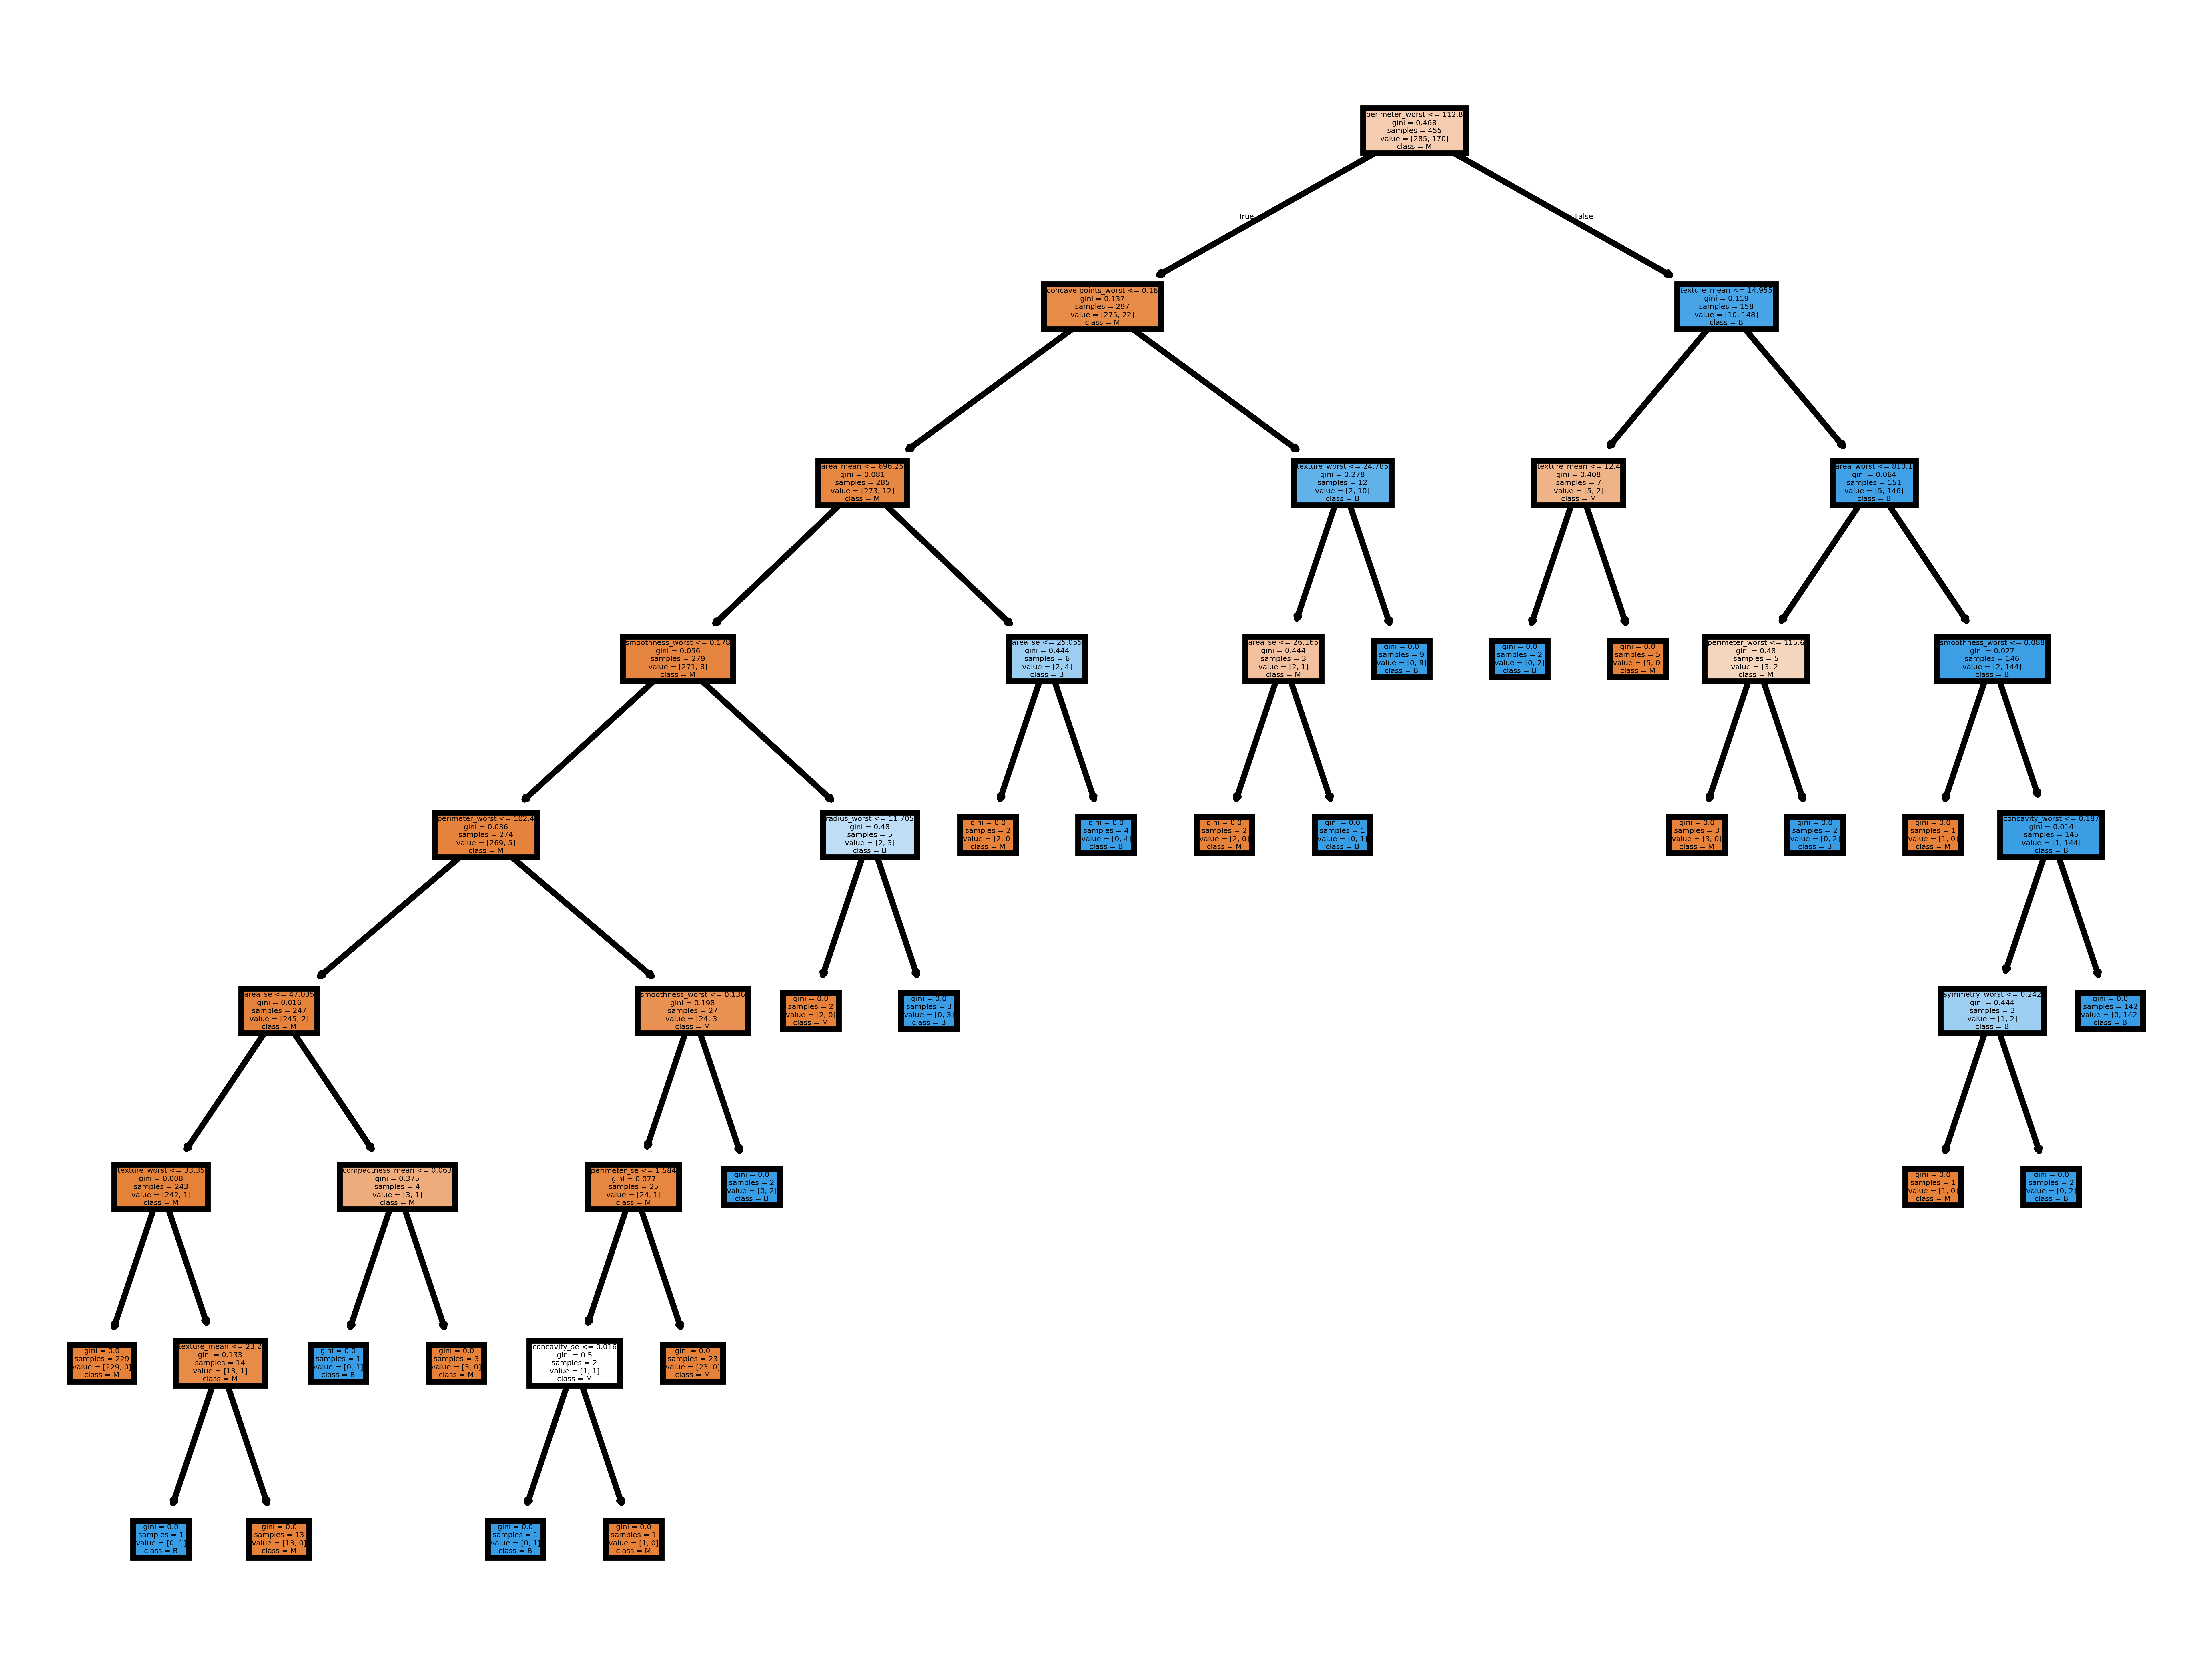

In [63]:
fn = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'
     ,'compactness_mean','concavity_mean','concave points_mean','symmetry_mean',
     'fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se',
     'smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
     'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
     'smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
'symmetry_worst','fractal_dimension_worst']
cn = ['M','B']
plt.figure(dpi = 1500)
tree.plot_tree(model1,feature_names = fn,class_names = cn,filled=True)

In [65]:
pred1 = model1.predict(X_test)
pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [66]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [74]:
model2 = DecisionTreeClassifier(criterion = 'gini',max_depth= None,ccp_alpha = 0.12)
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.12)

In [75]:
fn = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'
     ,'compactness_mean','concavity_mean','concave points_mean','symmetry_mean',
     'fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se',
     'smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
     'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
     'smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
'symmetry_worst','fractal_dimension_worst']
cn = ['M','B']
plt.figure(dpi = 1500)
tree.plot_tree(model2,feature_names = fn,class_names = cn,filled=True)

[Text(0.5, 0.75, 'perimeter_worst <= 112.8\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = M'),
 Text(0.25, 0.25, 'gini = 0.137\nsamples = 297\nvalue = [275, 22]\nclass = M'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.119\nsamples = 158\nvalue = [10, 148]\nclass = B'),
 Text(0.625, 0.5, '  False')]

In [76]:
pred2 = model2.predict(X_test)
pred2

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [77]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        72
           1       0.94      0.71      0.81        42

    accuracy                           0.88       114
   macro avg       0.90      0.84      0.86       114
weighted avg       0.88      0.88      0.87       114



In [78]:
path = model.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00857172, 0.00879121, 0.01025767, 0.01143106,
       0.01405386, 0.01515736, 0.01727097, 0.01819582, 0.02909646,
       0.03215458, 0.03668714, 0.04333995, 0.09999178, 0.58672758])

In [79]:
# selection optimla ccp_alpha
train_accuracy,test_accuracy = [],[]
for each in alphas:
    model = DecisionTreeClassifier(criterion = 'gini',ccp_alpha = each)
    model.fit(X_train,y_train)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,train_predict))
    test_accuracy.append(accuracy_score(y_test,test_predict))

train_accuracy, test_accuracy

([1.0,
  0.9582417582417583,
  0.9582417582417583,
  0.9582417582417583,
  0.9538461538461539,
  0.9472527472527472,
  0.9472527472527472,
  0.9472527472527472,
  0.9472527472527472,
  0.9472527472527472,
  0.9296703296703297,
  0.9296703296703297,
  0.9296703296703297,
  0.9296703296703297,
  0.6263736263736264],
 [0.9122807017543859,
  0.9122807017543859,
  0.9122807017543859,
  0.9122807017543859,
  0.9210526315789473,
  0.9298245614035088,
  0.9298245614035088,
  0.9298245614035088,
  0.9298245614035088,
  0.9298245614035088,
  0.8771929824561403,
  0.8771929824561403,
  0.8771929824561403,
  0.8771929824561403,
  0.631578947368421])

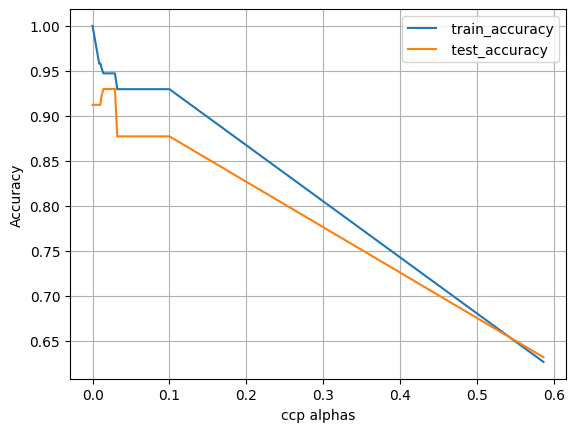

In [80]:
plt.plot(alphas,train_accuracy,label = ' train_accuracy')
plt.plot(alphas,test_accuracy,label = ' test_accuracy')
plt.xlabel('ccp alphas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [81]:
model3 = DecisionTreeClassifier(criterion = 'gini',max_depth= None,ccp_alpha = 0.55)
model3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.55)

[Text(0.5, 0.5, 'gini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = M')]

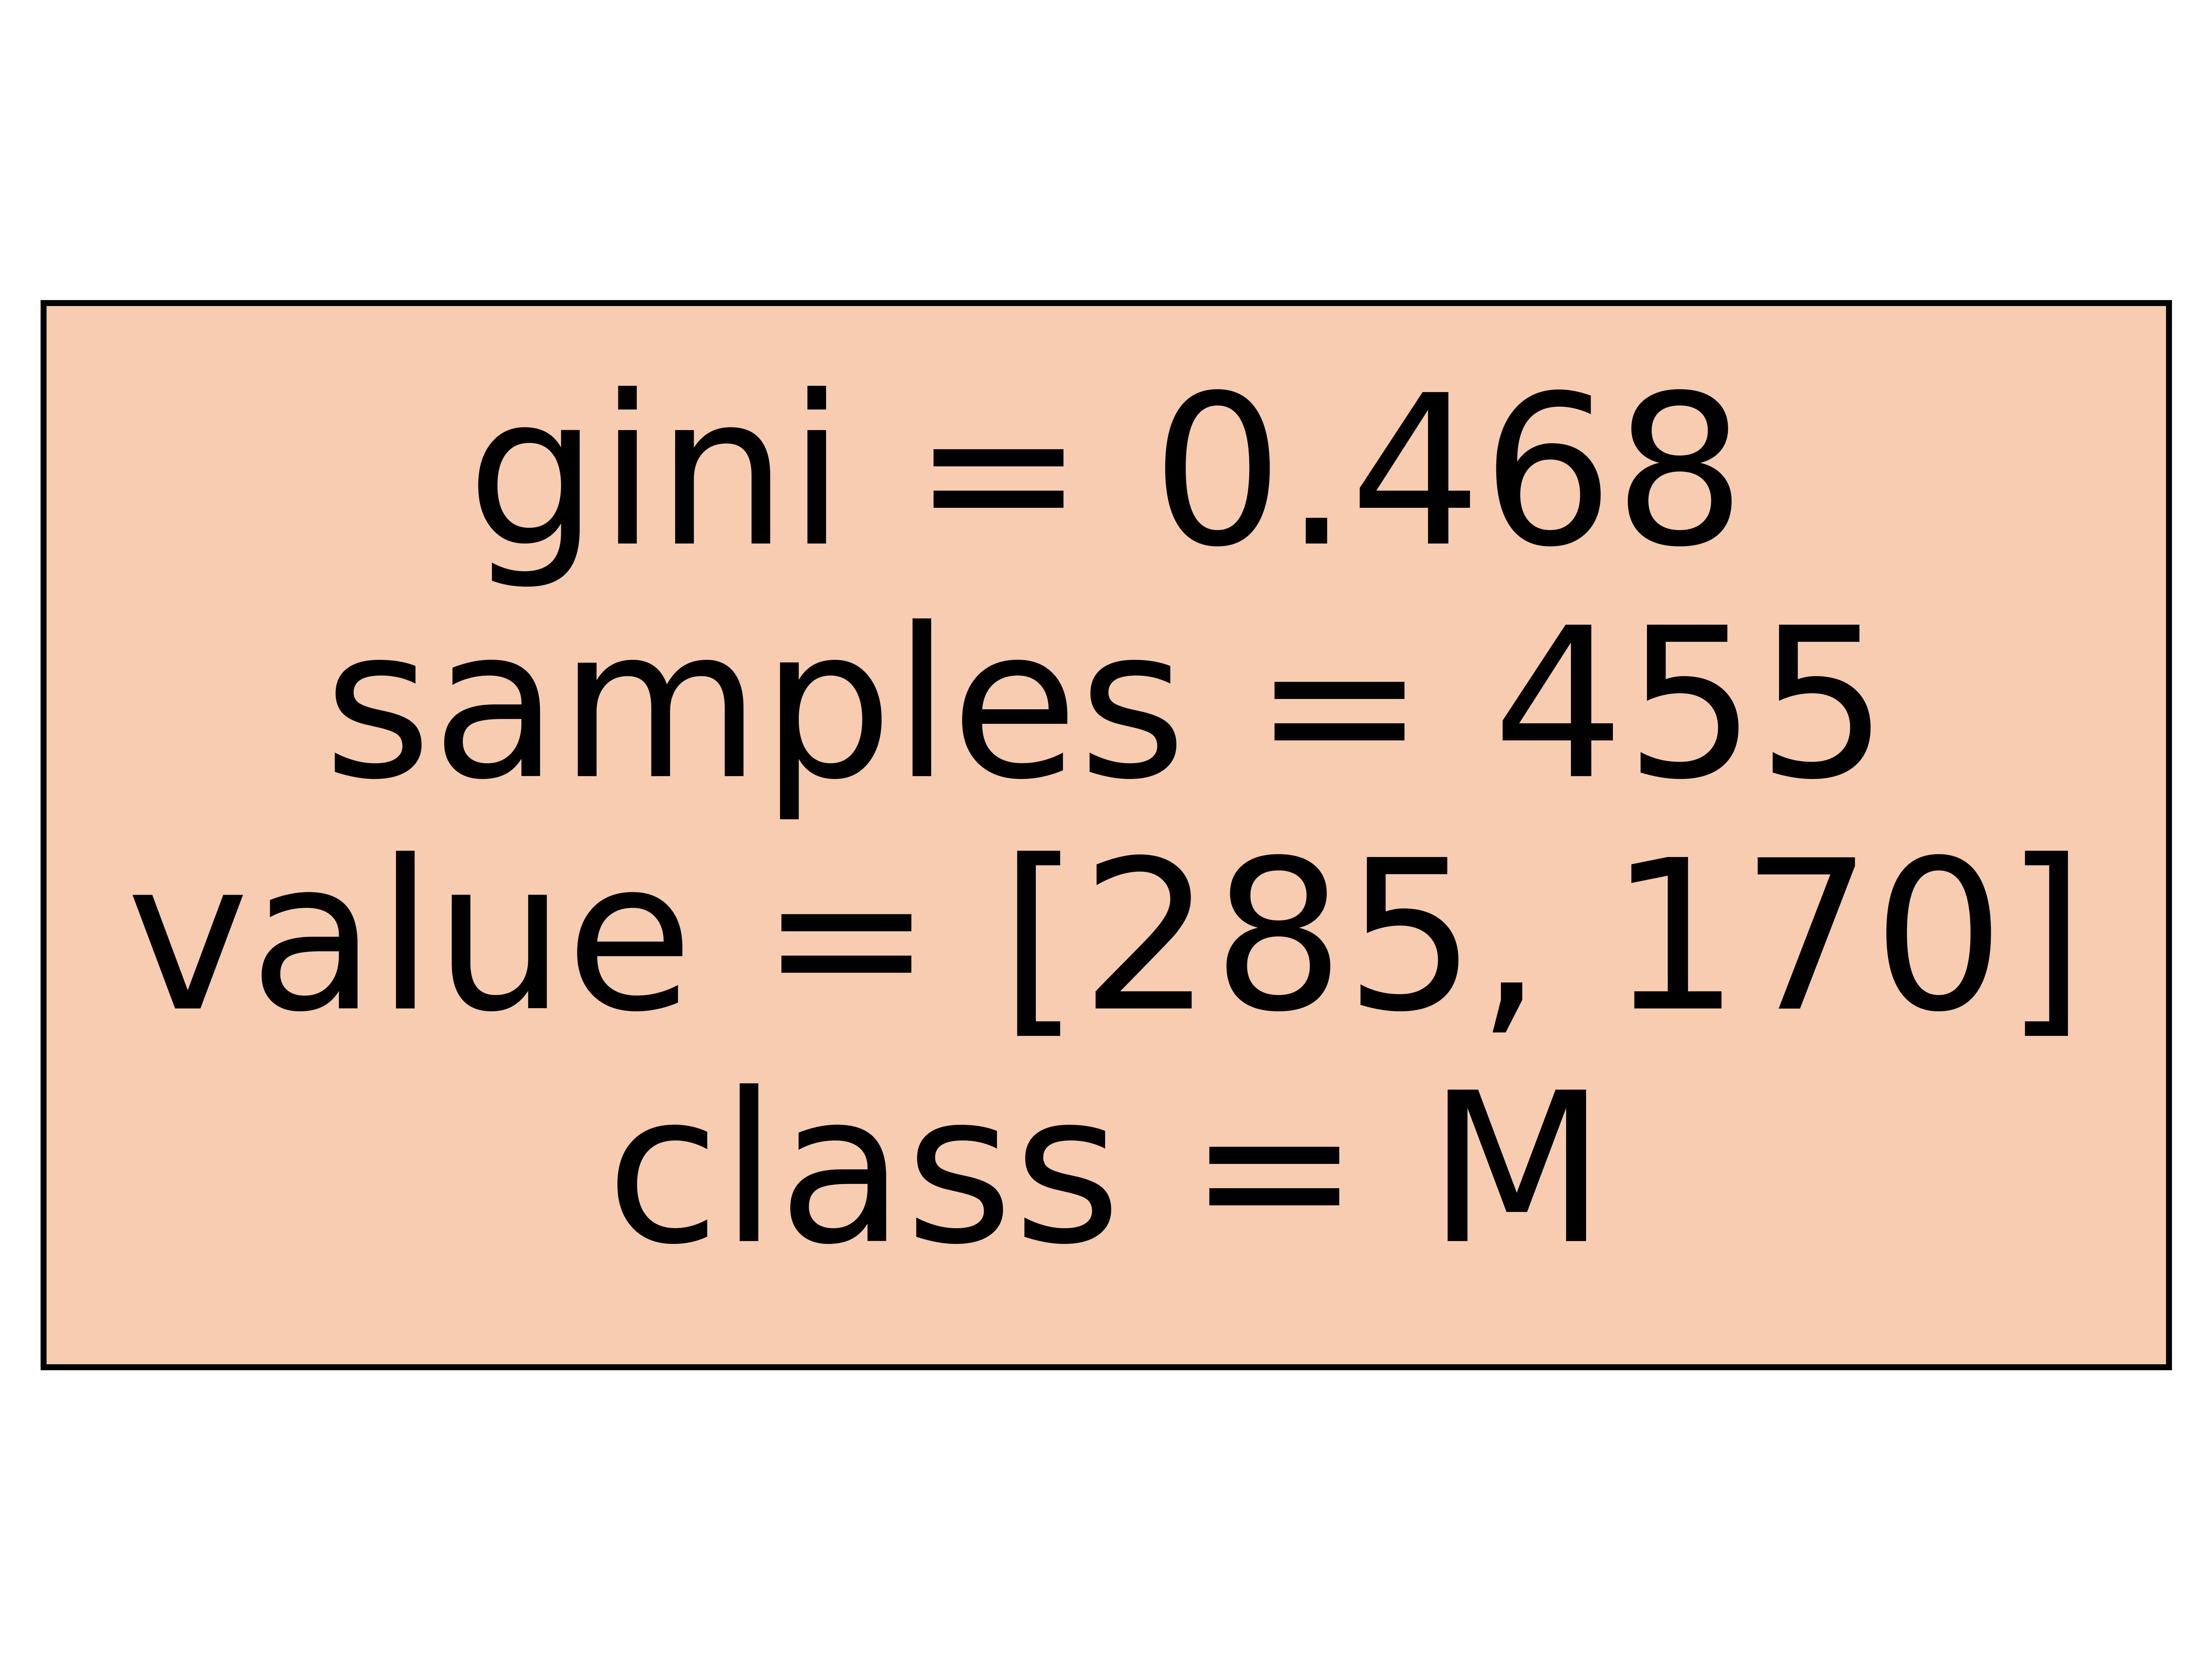

In [82]:
fn = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'
     ,'compactness_mean','concavity_mean','concave points_mean','symmetry_mean',
     'fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se',
     'smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
     'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
     'smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
'symmetry_worst','fractal_dimension_worst']
cn = ['M','B']
plt.figure(dpi = 1500)
tree.plot_tree(model3,feature_names = fn,class_names = cn,filled=True)

In [83]:
pred3 = model3.predict(X_test)
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [84]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/home/rgukt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rgukt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rgukt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
